# Módulo  - Estatística II

## Projeto - Análise do dataset "Wine Quality"

### Instruções

- O projeto deverá ser entregue até dia 05/05;
- O projeto poderá ser feito __individualmente__ ou em __grupos__ de até __4 pessoas__;

### Informações sobre o projeto

Dataset (conjunto de dados a ser utilizado) está disponível em:
    https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests): <br>
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data): <br>
- 12 - quality (score between 0 and 10)

Para ajudar no desenvolvimento do projeto, vamos separar o projeto em algumas seções, conforme descritas a seguir:

- __Preparação dos Dados e Verificação de Consistência__: Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de _outliers_ entre outras;

<br>

- __Análise Exploratória dos Dados__: Para fazermos a modelagem, precisamos conhecer muito bem os dados que estamos trabalhando. Por isso, nesta parte do projeto vocês desenvolveram análaises e gráficos a respeito dos dados que estão utilizando. Tente tirar ao máximo informações sobre as variáveis em si e suas relações com as demais;

<br>

- __Modelagem dos Dados__: Nesta parte, o projeto será dividido em dois modelos, um de Regressão Linear e outra de Regressão Logística. No __primeiro módulo__, o objetivo será modelar um regressor que estime o valor da qualidade do vinho (para este primeiro modelo, desconsidere a variável `quality`). No __segundo modelo__, utilizando como variável resposta (_target_) a variável `quality`, modelar um classificador que separe entre vinhos bons e ruins (para isto, considere `quality` >= 6 como um vinho bom). Além disso, avaliar a necessidade ou não de aplicar regularizações no modelo.

<br>

- __Conclusões sobre o Projeto__: Para finalizar, descreva as suas conclusões sobre o desenvolvimento do modelo e os resultados obtidos.

<br>

__Importante:__ Façam as análise em ambas as bases `winequality-red.csv` e `winequality-white.csv` separadamente, e depois misturem os dados para uma nova análise (no total serão 3 análises a serem feitas).

<br>

A entrega deve ser feita em um arquivo _Jupyter Notebook_ em aba que será disponibilizada no Class, contendo todo o desenvolvimento do projeto e o nome(s) do(s) aluno(s).

Olhando para os dados:

In [2]:
# Carregando as bibliotecas

import pandas as pd
import numpy as np
import statistics as sts
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score,  precision_score, recall_score, f1_score, r2_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Carregando conjunto de dados e visualizando primeiros registros

red_wine = pd.read_csv('../Datasets/winequality-red.csv', sep =';')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Informações gerais sobre os dados

red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# Buscando registros duplicados

red_wine[red_wine.duplicated(keep=False)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
22,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [7]:
# Excluindo registros duplicados e checando se realmente foram excluidos

red_wine.drop_duplicates(keep='first', inplace=True)
red_wine[red_wine.duplicated(keep=False)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [8]:
# Verificando a quantidade de registros após a exclusão dos registros duplicados

len(red_wine)

1359

In [9]:
# Analisando estatísticas de todas as variáveis 

red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


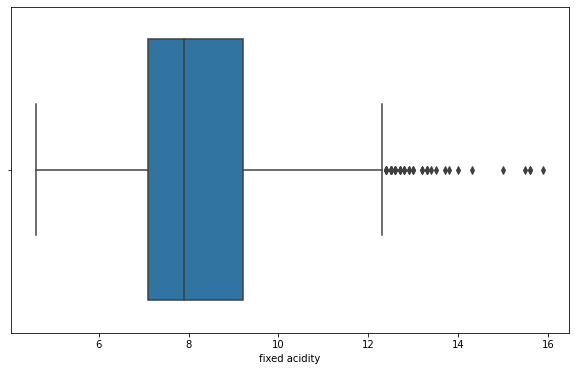

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(red_wine['fixed acidity']);

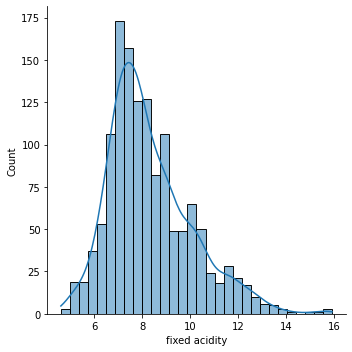

In [11]:
sns.displot(red_wine['fixed acidity'], kde = True);

In [12]:
desv = red_wine['fixed acidity'].std()
desv

1.736989807532466

In [13]:
media = red_wine['fixed acidity'].mean()
media

8.310596026490087

In [14]:
red_wine[(red_wine['fixed acidity'] > (media + (2 * desv))) | (red_wine['fixed acidity'] < (media - (2 * desv)))]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4
95,4.7,0.60,0.17,2.3,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,6
205,12.8,0.30,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
241,12.0,0.38,0.56,2.1,0.093,6.0,24.0,0.99925,3.14,0.71,10.9,6
243,15.0,0.21,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
...,...,...,...,...,...,...,...,...,...,...,...,...
811,12.9,0.50,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6
814,12.6,0.41,0.54,2.8,0.103,19.0,41.0,0.99939,3.21,0.76,11.3,6
937,12.0,0.63,0.50,1.4,0.071,6.0,26.0,0.99791,3.07,0.60,10.4,4
979,12.2,0.45,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


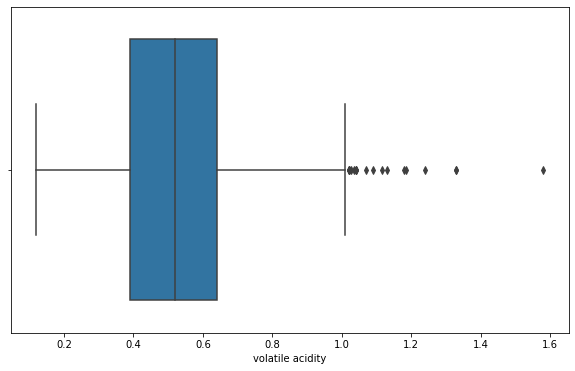

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(red_wine['volatile acidity']);

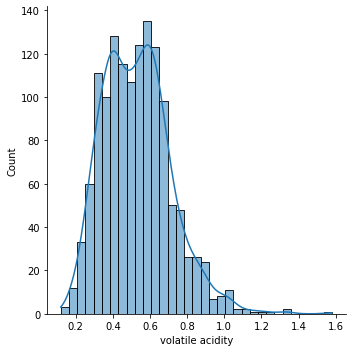

In [16]:
sns.displot(red_wine['volatile acidity'], kde = True);

In [17]:
red_wine['citric acid'].describe()

count    1359.000000
mean        0.272333
std         0.195537
min         0.000000
25%         0.090000
50%         0.260000
75%         0.430000
max         1.000000
Name: citric acid, dtype: float64

In [18]:
red_wine['citric acid'].value_counts()

0.00    118
0.49     59
0.24     41
0.02     38
0.08     32
       ... 
0.72      1
0.62      1
0.71      1
0.79      1
0.78      1
Name: citric acid, Length: 80, dtype: int64

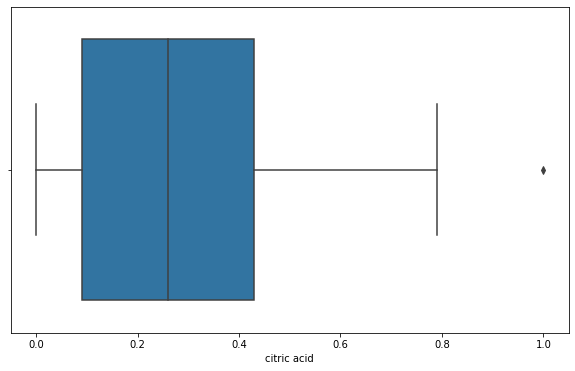

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(red_wine['citric acid']);

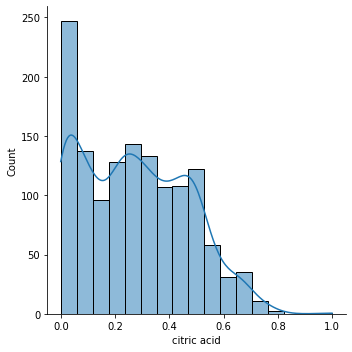

In [20]:
sns.displot(red_wine['citric acid'], kde = True);

In [21]:
red_wine['citric acid'].sort_values(ascending=False)

151     1.00
353     0.79
1574    0.78
395     0.76
442     0.76
        ... 
712     0.00
1334    0.00
1336    0.00
35      0.00
0       0.00
Name: citric acid, Length: 1359, dtype: float64

In [22]:
red_wine.drop(151, inplace = True)

In [23]:
red_wine['citric acid'].describe()

count    1358.000000
mean        0.271797
std         0.194608
min         0.000000
25%         0.090000
50%         0.260000
75%         0.430000
max         0.790000
Name: citric acid, dtype: float64

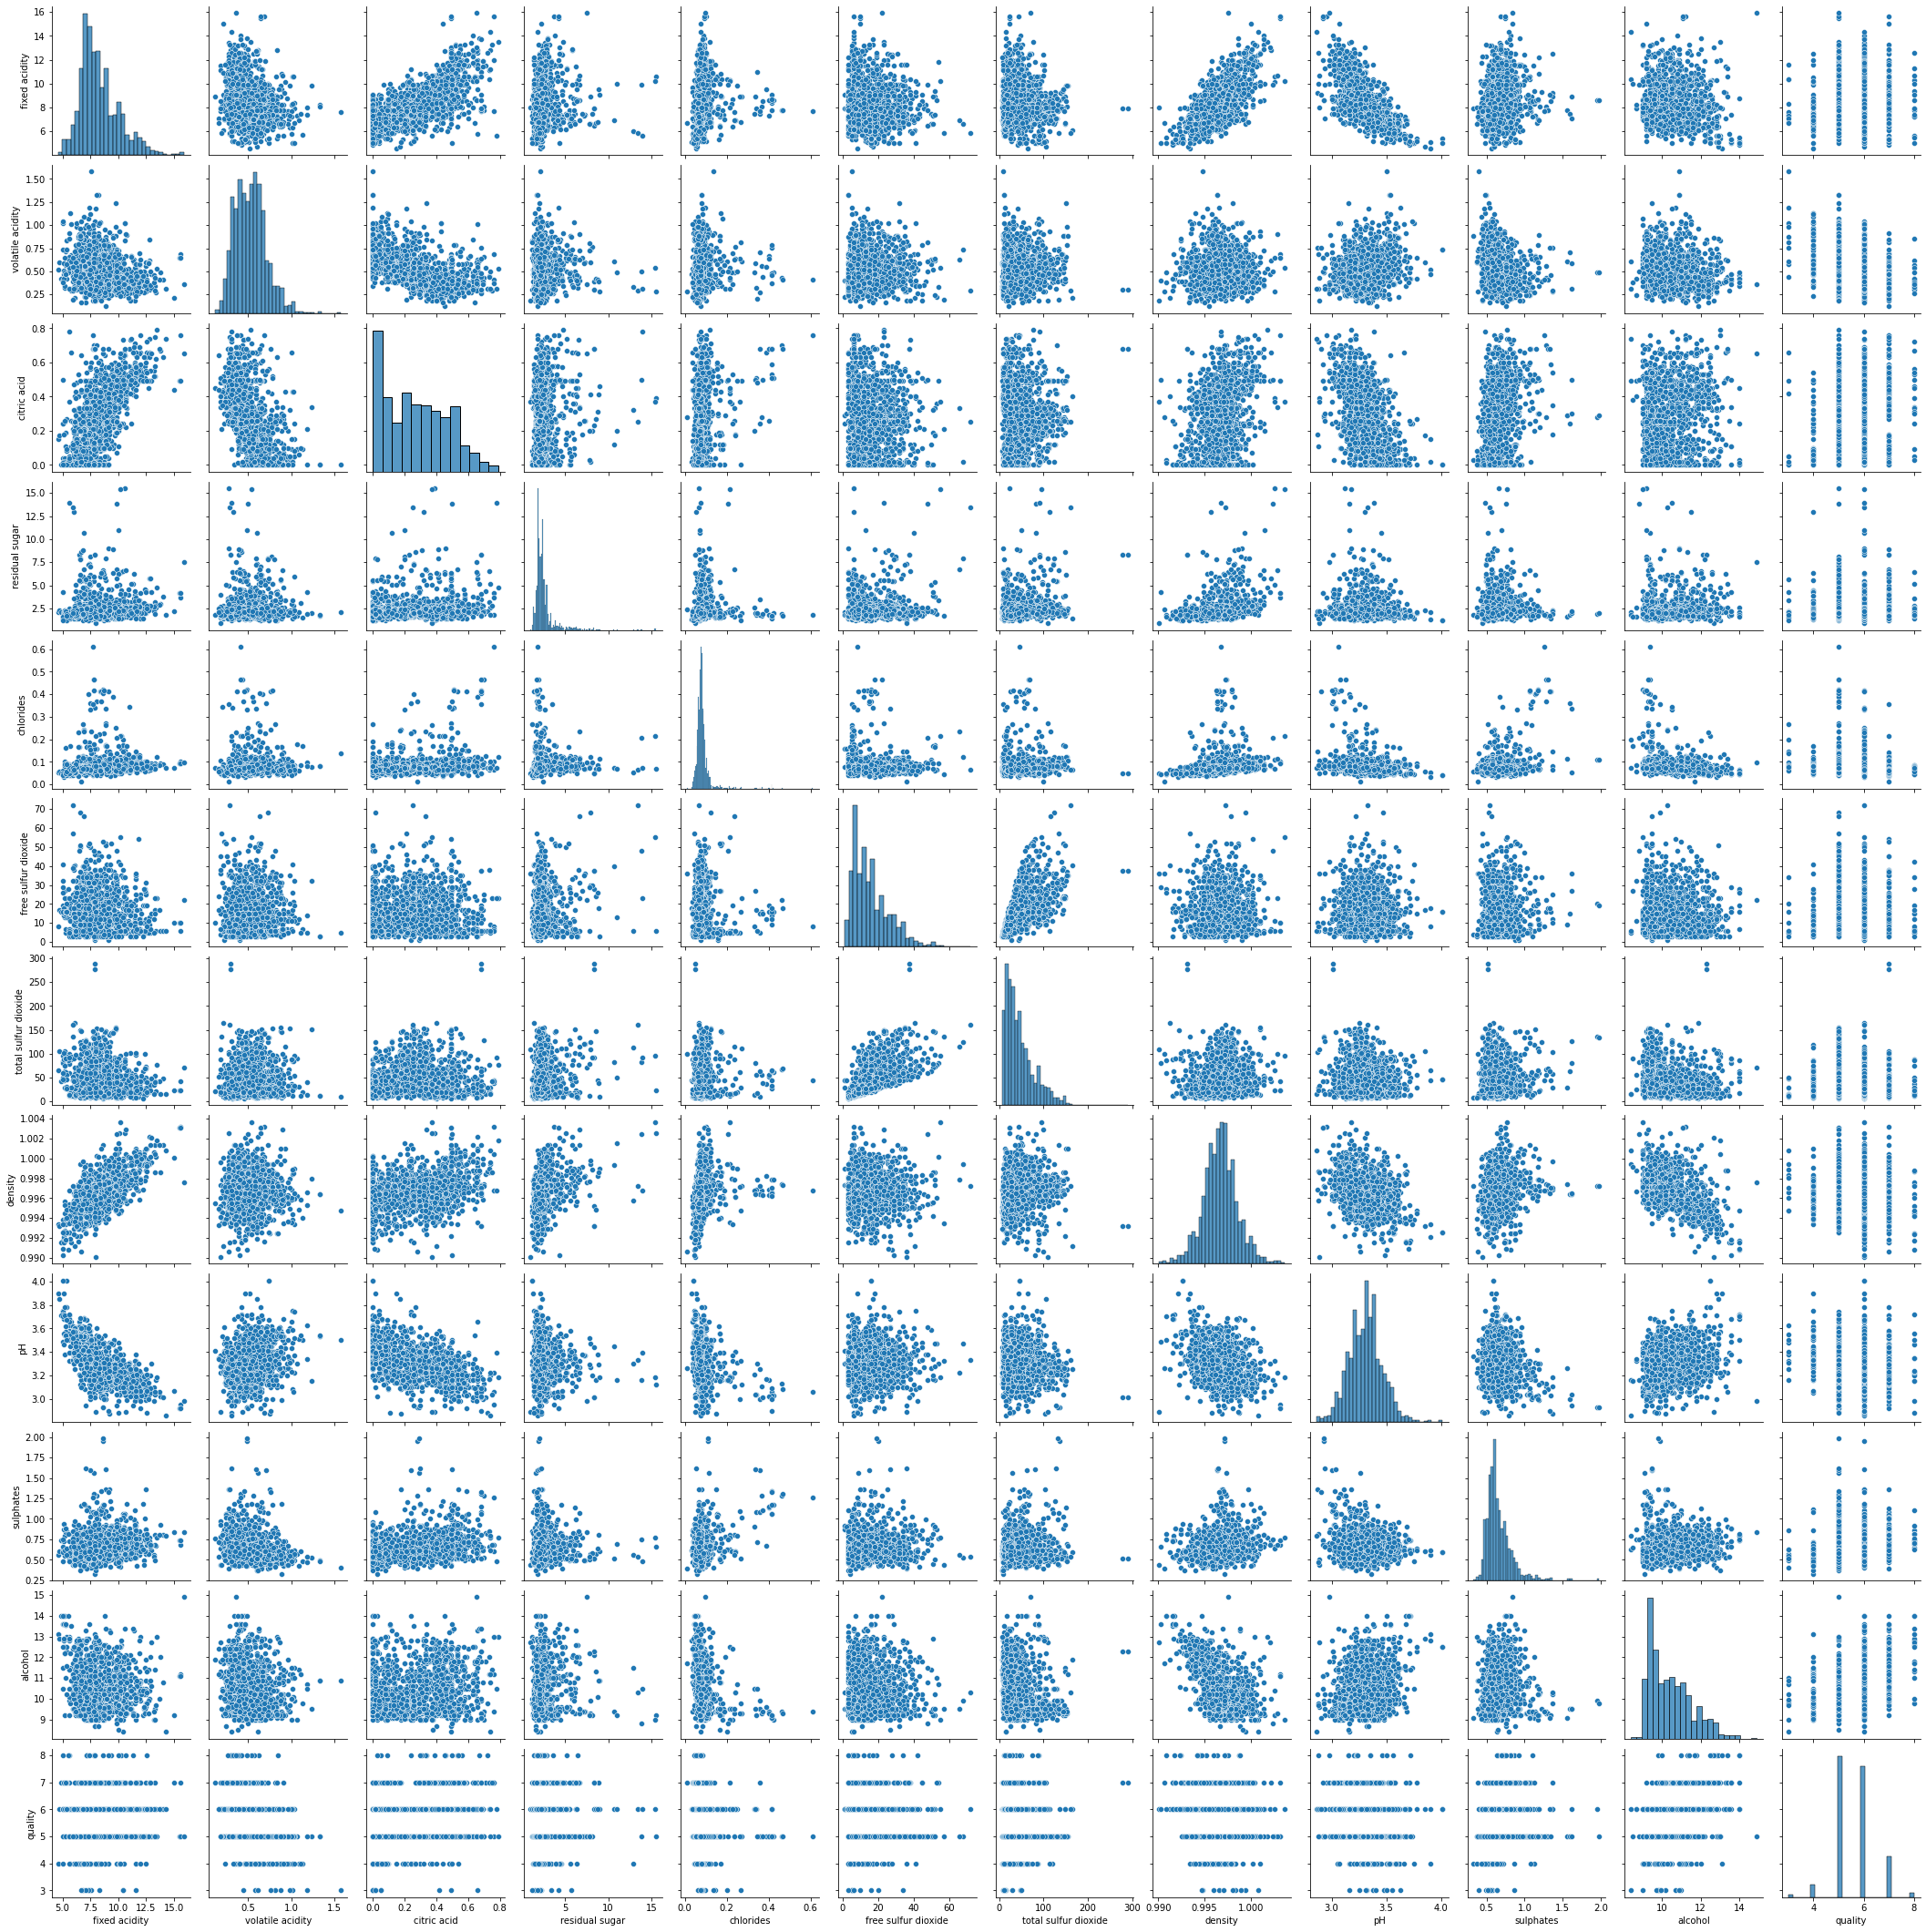

In [24]:
sns.pairplot(red_wine)

In [25]:
red_wine['quality'].value_counts()

5    577
6    535
7    167
4     52
8     17
3     10
Name: quality, dtype: int64

In [26]:
red_wine['quality'].sort_values(ascending = False)

828     8
495     8
1549    8
390     8
481     8
       ..
517     3
1299    3
1478    3
899     3
459     3
Name: quality, Length: 1358, dtype: int64

In [27]:
# Acrescentar a coluna Target para classificar os vinhos

red_wine['target'] = np.where(red_wine['quality'] >= 6, 1, 0)

In [28]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0


In [29]:
red_wine['target'].value_counts()

1    719
0    639
Name: target, dtype: int64

In [30]:
# Fazendo casting da variavel resposta para regressão linear

red_wine = red_wine.astype({'quality':float})

In [31]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5.0,0


In [56]:
# Dividir os dados em X e y

X_linear = red_wine.iloc[:,0:11]
y_linear = red_wine.iloc[:,11]

In [33]:
# Dividir em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X_linear, y_linear,
                                                    test_size = 0.3,
                                                    random_state = 42,
                                                    stratify = y_linear)

In [34]:
# Instanciando modelo de regressāo linear

linear_scaler = StandardScaler()

In [35]:
# Normalizaçāo dos dados pois devem estar na mesma escala

X_train_std = linear_scaler.fit_transform(X_train)
X_test_std = linear_scaler.transform(X_test)

In [36]:
# Instancia o modelo de regressão linear

linear_model = LinearRegression()

In [37]:
# Fit dos dados (treinando o modelo)

linear_model.fit(X_train_std, y_train)

LinearRegression()

In [38]:
# Vamos fazer as predições com os dados de teste 

y_pred_linear = linear_model.predict(X_test_std)
#y_pred_linear = np.round(y_pred_linear)
y_pred_linear

array([5.18795613, 5.61118947, 6.46222656, 5.33882813, 5.89862412,
       4.99932182, 5.32533223, 5.40466967, 5.11834305, 5.76957984,
       5.84662474, 5.82410919, 5.24955544, 5.16562016, 5.39748175,
       5.25017539, 4.49727763, 5.29609394, 5.66309915, 5.51373086,
       5.27141571, 6.24807147, 5.42549809, 5.53743413, 6.19320811,
       5.55439333, 5.09586994, 6.76501046, 5.03479731, 5.84984147,
       5.81295829, 5.54636759, 5.1307306 , 4.9959326 , 5.19898586,
       6.17682425, 6.56002102, 5.41440685, 5.43893929, 6.52635285,
       4.88963681, 6.01980144, 5.30739523, 6.12816047, 5.94161274,
       5.24761411, 6.13493688, 5.90210802, 5.23496421, 5.76708731,
       5.29964824, 5.5715854 , 5.85346603, 6.19356332, 6.09207485,
       4.93603659, 5.79704481, 5.13407658, 5.28597628, 5.70972418,
       6.51681259, 5.44166244, 5.64450824, 5.59629968, 6.42192081,
       5.69617027, 5.74318087, 5.1495753 , 5.64963677, 6.07988261,
       5.9422744 , 5.27659651, 5.59752076, 5.97419677, 5.64477

In [39]:
len(y_pred_linear)

408

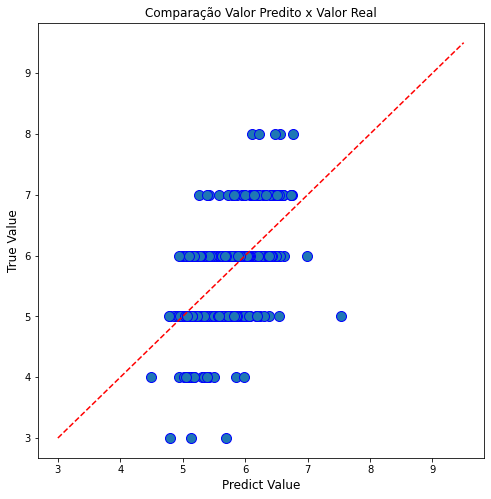

In [40]:
# Vamos criar um gráfico para comparar os Valores Reais com os Preditos

fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred_linear, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show()

In [41]:
# Calcula o R2 score
R2 = r2_score(y_test, y_pred_linear)

# Print do valor do R2
print('R2: ', R2)

R2:  0.3441172194024893


Feature: 0, Score: 0.03380
Feature: 1, Score: -0.18744
Feature: 2, Score: -0.00704
Feature: 3, Score: 0.00565
Feature: 4, Score: -0.06076
Feature: 5, Score: 0.02754
Feature: 6, Score: -0.06551
Feature: 7, Score: -0.02124
Feature: 8, Score: -0.05952
Feature: 9, Score: 0.15189
Feature: 10, Score: 0.33073
Feature: 0, Score: 0.03380
Feature: 1, Score: -0.18744
Feature: 2, Score: -0.00704
Feature: 3, Score: 0.00565
Feature: 4, Score: -0.06076
Feature: 5, Score: 0.02754
Feature: 6, Score: -0.06551
Feature: 7, Score: -0.02124
Feature: 8, Score: -0.05952
Feature: 9, Score: 0.15189
Feature: 10, Score: 0.33073


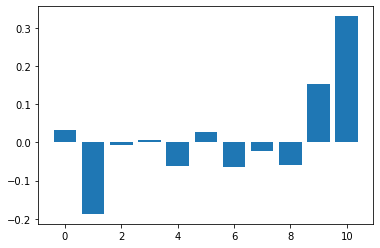

In [54]:
# get importance
importance = linear_model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# p
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [42]:
# Criando variáveis X e y para modelo de regressão logística

X = red_wine.iloc[:,0:11]
y = red_wine.iloc[:,12]

In [43]:
# Instanciando modelo de regressāo logística

logistic_model = LogisticRegression()

In [44]:
# Dividir em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42,
                                                    stratify = y)

In [45]:
# Instanciando o objeto de normalização

scaler = StandardScaler()

In [46]:
# Normalizaçāo dos dados pois devem estar na mesma escala

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [47]:
# Fit dos dados (treinando o modelo)

logistic_model.fit(X_train_std, y_train)

LogisticRegression()

In [48]:
# Vamos fazer as predições com os dados de teste 

y_pred = logistic_model.predict(X_test_std)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,

In [49]:
# Print do classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       192
           1       0.74      0.69      0.72       216

    accuracy                           0.71       408
   macro avg       0.71      0.71      0.71       408
weighted avg       0.71      0.71      0.71       408



In [50]:
len(y_pred)

408

# Trabalhando com o conjunto de dados White Wine

In [51]:
# Carregando conjunto de dados e visualizando primeiros registros

white_wine = pd.read_csv('../Datasets/winequality-white.csv', sep =';')
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [52]:
# Buscando informações sobre os dados

white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [53]:
white_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [54]:
# Verfificando se há registros duplicados

white_wine[white_wine.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.800000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4828,6.4,0.23,0.35,10.3,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5
4850,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6
4851,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
4856,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6


In [55]:
# Removendo registros duplicados e verificando se foram removidos

white_wine.drop_duplicates(keep = 'first', inplace = True)
white_wine[white_wine.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [56]:
# Verificando tamanho do conjunto de dados após remover os duplicados

len(white_wine)

3961

In [57]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.3 KB


In [58]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


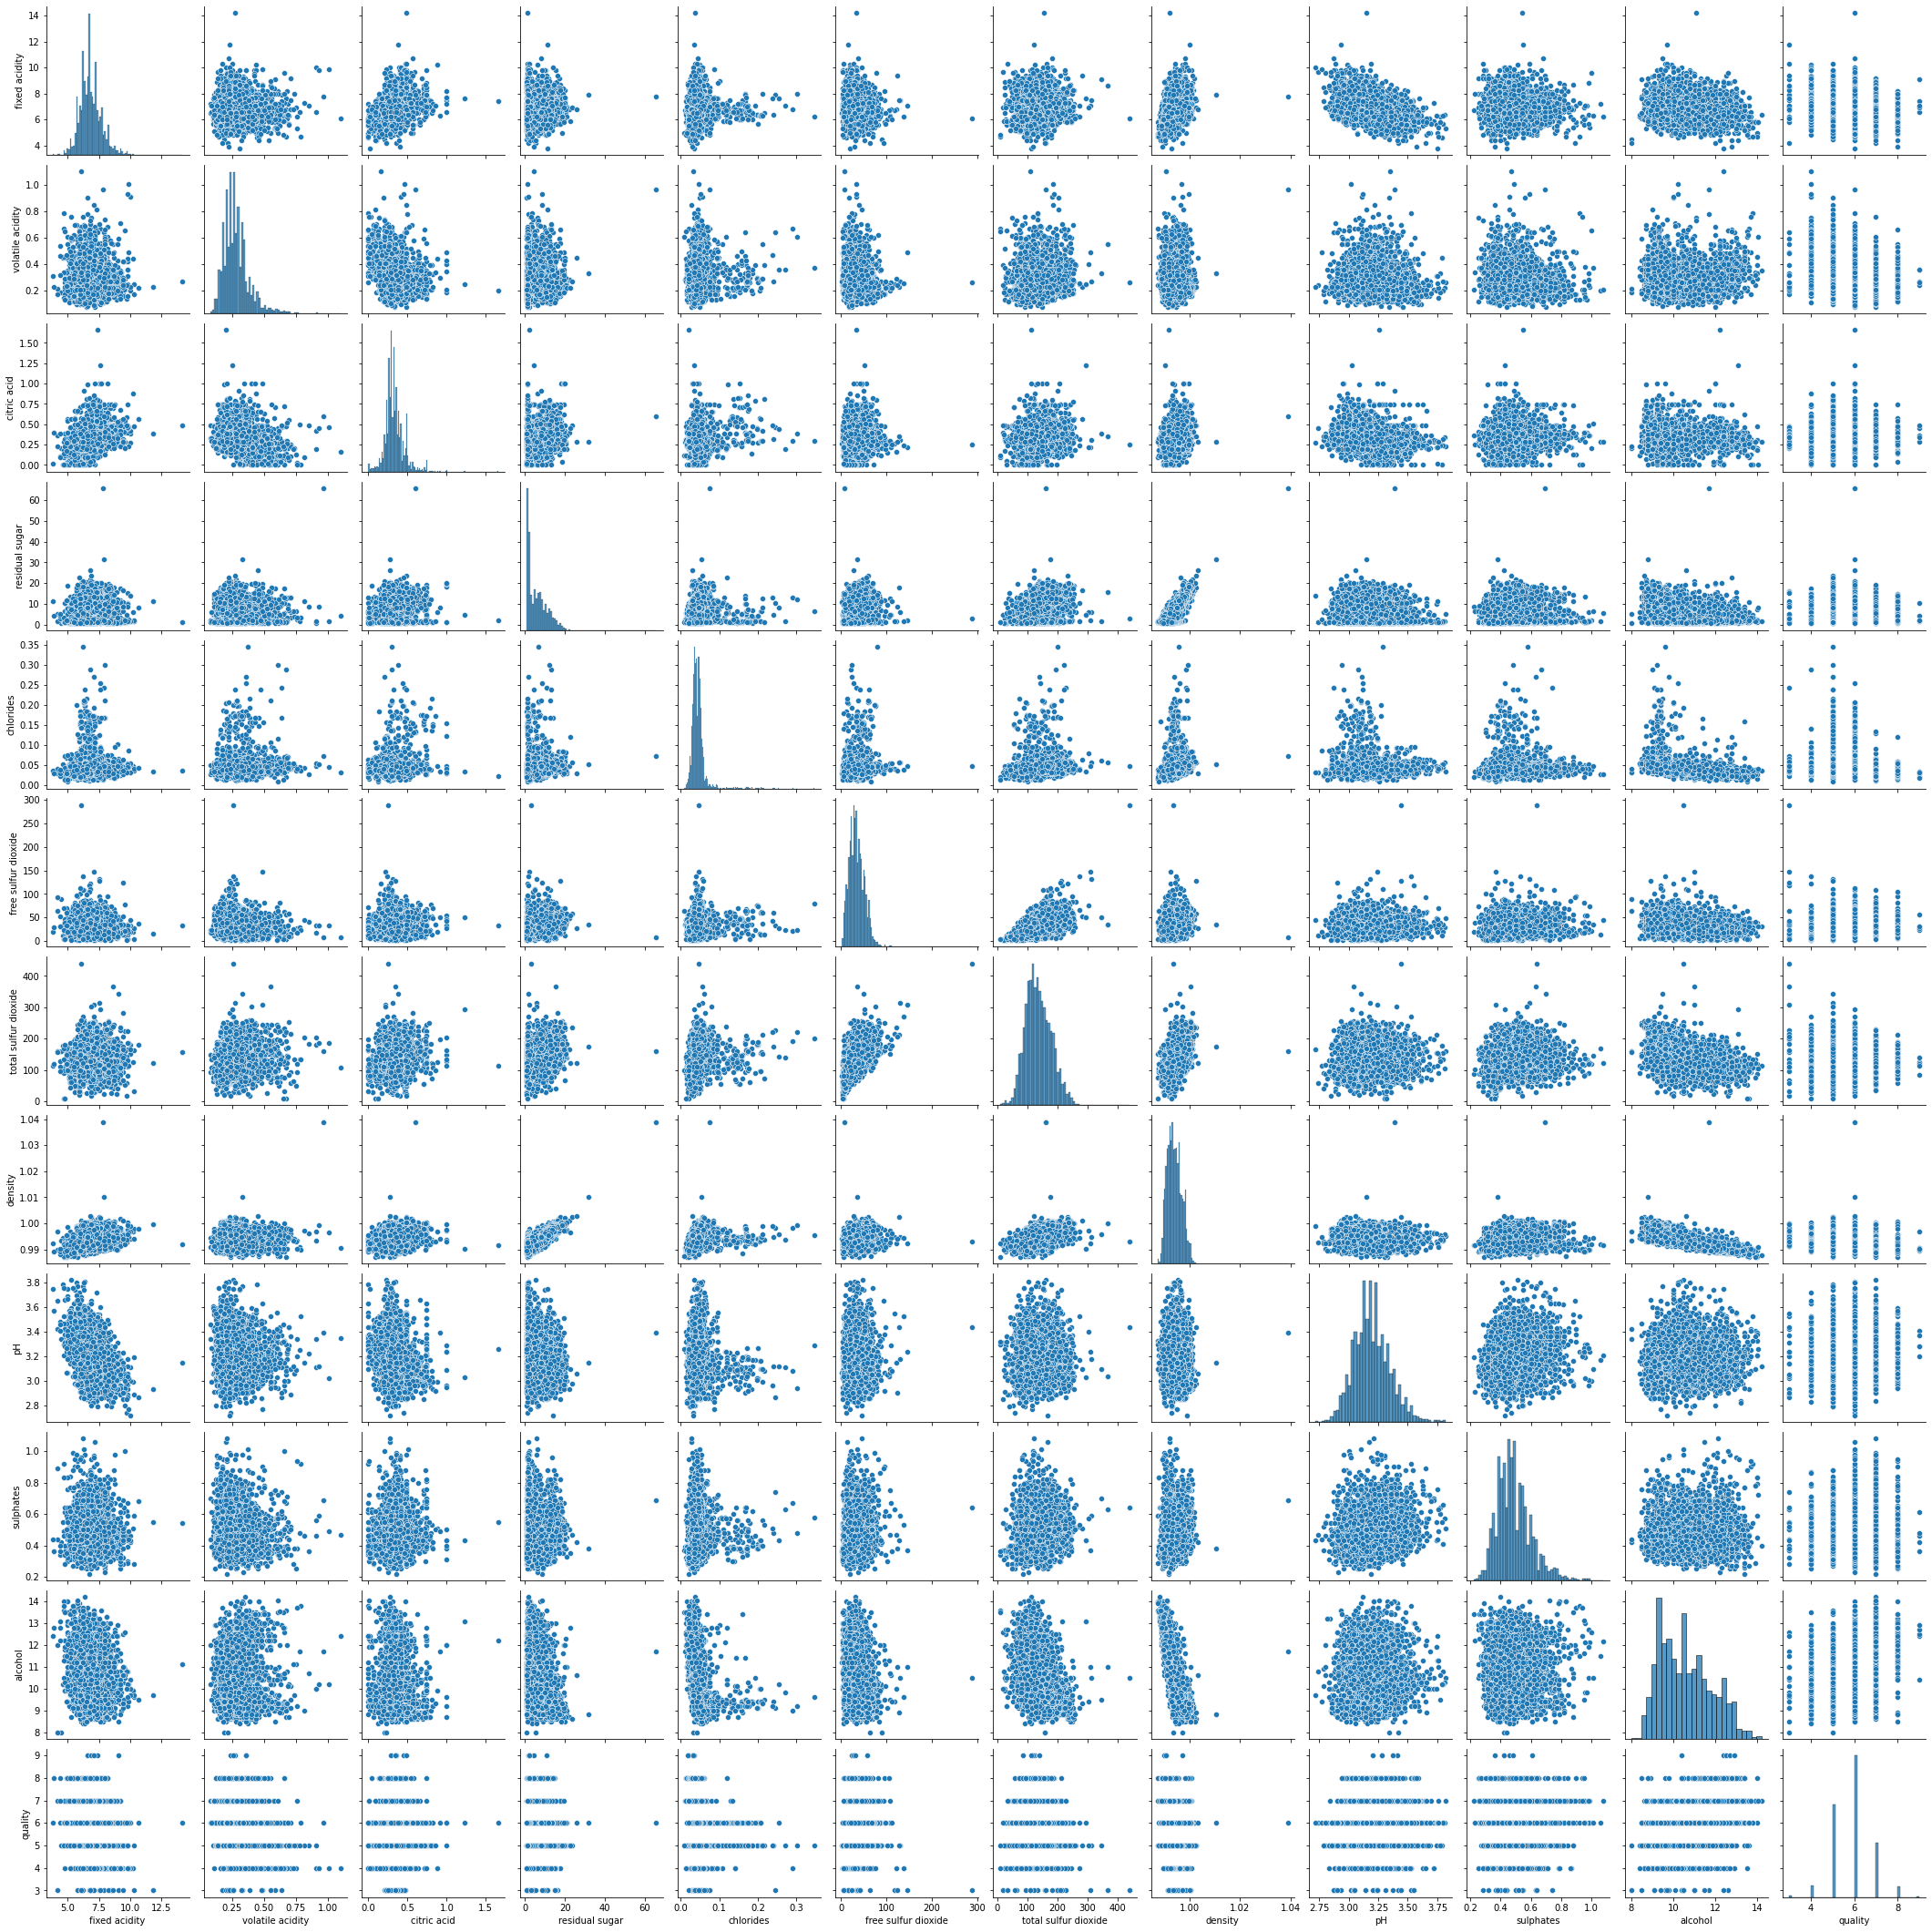

In [59]:
sns.pairplot(white_wine)

In [86]:
# Acrescentar a coluna Target para classificar os vinhos

white_wine['target'] = np.where(white_wine['quality'] >= 6, 1, 0)

In [120]:
# Fazendo casting da variavel resposta para regressão linear

white_wine = white_wine.astype({'quality':float})

In [121]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6.0,1


In [122]:
# Dividir os dados em X e y

X_linear = white_wine.iloc[:,0:11]
y_linear = white_wine.iloc[:,11]

In [123]:
# Dividir em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X_linear, y_linear,
                                                    test_size = 0.3,
                                                    random_state = 42,
                                                    stratify = y_linear)

In [124]:
# Instanciando modelo de regressāo linear

linear_scaler = StandardScaler()

In [125]:
# Normalizaçāo dos dados pois devem estar na mesma escala

X_train_std = linear_scaler.fit_transform(X_train)
X_test_std = linear_scaler.transform(X_test)

In [126]:
# Instancia o modelo de regressão linear

linear_model = LinearRegression()

In [127]:
# Fit dos dados (treinando o modelo)

linear_model.fit(X_train_std, y_train)

LinearRegression()

In [128]:
# Vamos fazer as predições com os dados de teste 

y_pred_linear = linear_model.predict(X_test_std)
y_pred_linear

array([6.46659318, 6.63926005, 5.53857794, ..., 5.20268594, 5.27012322,
       7.00889675])

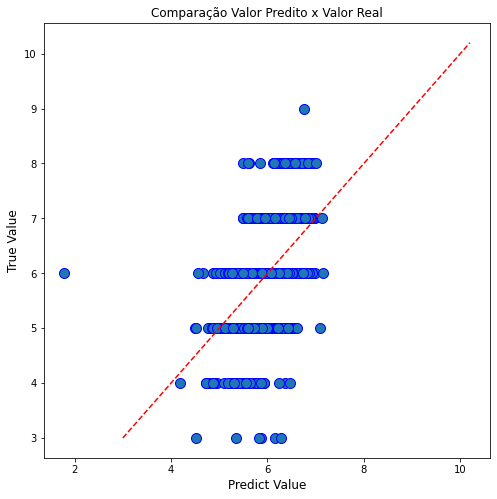

In [129]:
# Vamos criar um gráfico para comparar os Valores Reais com os Preditos

fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred_linear, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show()

In [130]:
# Calcula o R2 score
R2 = r2_score(y_test, y_pred_linear)

# Print do valor do R2
print('R2: ', R2)

R2:  0.2826650734489964


In [131]:
# Criando variáveis X e y para modelo de regressão logística

X = white_wine.iloc[:,0:11]
y = white_wine.iloc[:,12]

In [132]:
# Dividir em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42,
                                                    stratify = y)

In [133]:
# Instanciando modelo de regressāo linear

logistic_scaler = StandardScaler()

In [134]:
# Normalizaçāo dos dados pois devem estar na mesma escala

X_train_std = logistic_scaler.fit_transform(X_train)
X_test_std = logistic_scaler.transform(X_test)

In [135]:
# Instancia o modelo de regressão logistica

logistic_model = LogisticRegression()

In [136]:
# Fit dos dados (treinando o modelo)

logistic_model.fit(X_train_std, y_train)

LogisticRegression()

In [137]:
# Vamos fazer as predições com os dados de teste 

y_pred = logistic_model.predict(X_test_std)
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [138]:
# Print do classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.50      0.57       405
           1       0.77      0.87      0.82       784

    accuracy                           0.74      1189
   macro avg       0.72      0.69      0.69      1189
weighted avg       0.73      0.74      0.73      1189

